In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules,apriori

In [173]:
df1=pd.read_excel('Online retail.xlsx',header=None)

In [174]:
df1.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


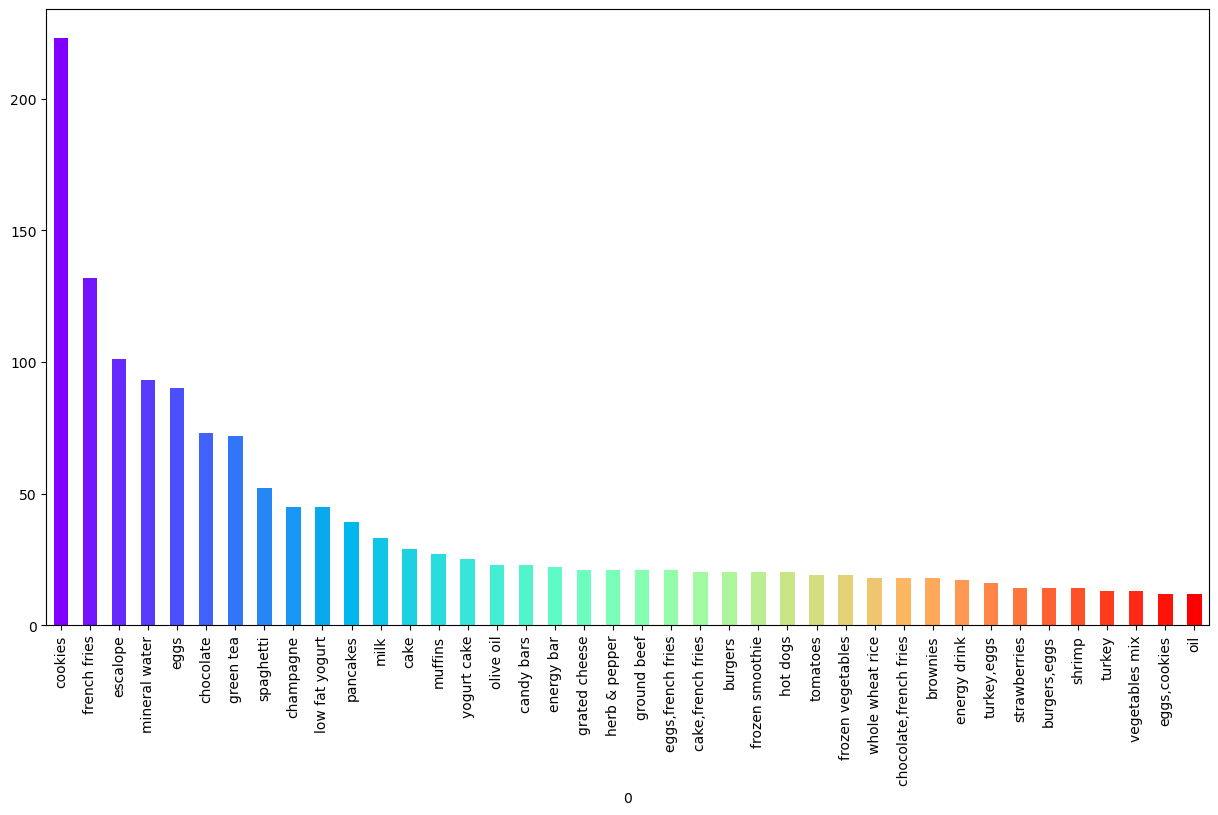

In [177]:
plt.figure(figsize=(15,8))
color= plt.cm.rainbow(np.linspace(0,1,40))
df1[0].value_counts().head(40).plot(kind='bar',color=color);

In [178]:
df1[0].values

array(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil',
       'burgers,meatballs,eggs', 'chutney', ..., 'chicken',
       'escalope,green tea',
       'eggs,frozen smoothie,yogurt cake,low fat yogurt'], dtype=object)

In [181]:
transactions=[]
transactions=[str(item) for row in df1.values for item in row] 
              

In [183]:
transactions

['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil',
 'burgers,meatballs,eggs',
 'chutney',
 'turkey,avocado',
 'mineral water,milk,energy bar,whole wheat rice,green tea',
 'low fat yogurt',
 'whole wheat pasta,french fries',
 'soup,light cream,shallot',
 'frozen vegetables,spaghetti,green tea',
 'french fries',
 'eggs,pet food',
 'cookies',
 'turkey,burgers,mineral water,eggs,cooking oil',
 'spaghetti,champagne,cookies',
 'mineral water,salmon',
 'mineral water',
 'shrimp,chocolate,chicken,honey,oil,cooking oil,low fat yogurt',
 'turkey,eggs',
 'turkey,fresh tuna,tomatoes,spaghetti,mineral water,black tea,salmon,eggs,chicken,extra dark chocolate',
 'meatballs,milk,honey,french fries,protein bar',
 'red wine,shrimp,pasta,pepper,eggs,chocolate,shampoo',
 'rice,sparkling water',
 'spaghetti,mineral water,ham,body sp

In [185]:
df = pd.DataFrame(transactions, columns=['items'])
df.head()

,items
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [187]:
df['items'] = df['items'].str.split(',')
df['items'] = df['items'].apply(lambda x: list(set([item.strip() for item in x])))


In [189]:
df['items'][0]

['cottage cheese',
 'salad',
 'almonds',
 'tomato juice',
 'vegetables mix',
 'green tea',
 'mineral water',
 'shrimp',
 'frozen smoothie',
 'olive oil',
 'yams',
 'low fat yogurt',
 'honey',
 'antioxydant juice',
 'avocado',
 'energy drink',
 'whole weat flour',
 'green grapes',
 'spinach',
 'salmon']

In [191]:
df_exploded = df.explode('items')
df_exploded['Transaction'] = df_exploded.index
df_exploded

,items,Transaction
0,cottage cheese,0
0,salad,0
0,almonds,0
0,tomato juice,0
0,vegetables mix,0
...,...,...
7499,escalope,7499
7500,yogurt cake,7500
7500,low fat yogurt,7500
7500,eggs,7500


In [192]:
basket = pd.crosstab(df_exploded['Transaction'], df_exploded['items'])
basket.head()


items,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
Transaction,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [195]:
from collections import Counter

In [198]:
item_counts = Counter()

for transaction in transactions:
    items = transaction.split(',')
    item_counts.update(items)

print(item_counts)


Counter({'mineral water': 1788, 'eggs': 1348, 'spaghetti': 1306, 'french fries': 1282, 'chocolate': 1230, 'green tea': 991, 'milk': 972, 'ground beef': 737, 'frozen vegetables': 715, 'pancakes': 713, 'burgers': 654, 'cake': 608, 'cookies': 603, 'escalope': 595, 'low fat yogurt': 574, 'shrimp': 536, 'tomatoes': 513, 'olive oil': 494, 'frozen smoothie': 475, 'turkey': 469, 'chicken': 450, 'whole wheat rice': 439, 'grated cheese': 393, 'cooking oil': 383, 'soup': 379, 'herb & pepper': 371, 'honey': 356, 'champagne': 351, 'fresh bread': 323, 'salmon': 319, 'brownies': 253, 'avocado': 250, 'hot dogs': 243, 'cottage cheese': 239, 'tomato juice': 228, 'butter': 226, 'whole wheat pasta': 221, 'red wine': 211, 'yogurt cake': 205, 'light mayo': 204, 'energy bar': 203, 'ham': 203, 'energy drink': 200, 'pepper': 199, 'vegetables mix': 193, 'cereals': 193, 'muffins': 181, 'oil': 173, 'french wine': 169, 'fresh tuna': 167, 'strawberries': 160, 'meatballs': 157, 'almonds': 153, 'parmesan cheese': 149

In [200]:
unique_items = set()

# Loop through each transaction and add the items to the set
for transaction in transactions:
    items = transaction.split(',')
    unique_items.update(items)

unique_items

{' asparagus',
 'almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashe

In [206]:
basket_bool = basket.astype(bool)
basket_bool

items,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
Transaction,,,,,,,,,,,,,,,,,,,,,
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [208]:
frequent_pattern=apriori(basket_bool, min_support=0.05,use_colnames=True)
frequent_pattern

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [210]:
association_rules(frequent_pattern,min_threshold=0.05,metric='confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,1.0,0.013604,1.073256,0.339197,0.150648,0.068256,0.271158
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
2,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,1.0,0.008090,1.062815,0.193648,0.138707,0.059103,0.248515
3,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,1.0,0.008090,1.043158,0.208562,0.138707,0.041372,0.248515
4,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
5,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796
